<a href="https://colab.research.google.com/github/AkhmadRamadani/PCVK-2025-PUBLIC/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: **Akhmad Ramadani**


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

## Fungsi Konvolusi
Fungsi convolution2d ini memiliki 4 parameter yaitu image, kernel, stride, dan padding.

1. image : matriks gambar 2 dimensi yang akan diolah oleh kernel dengan operasi konvolusi
2. kernel : matriks filter 2 dimensi yang digunakan untuk memproses gambar input, dimana ukuran kernel biasanya lebih kecil daripada gambar input
3. stride : bilangan bulat yang menunjukkan jumlah piksel yang diabaikan antara filter saat bergerak di sepanjang gambar input
4. padding : bilangan bulat yang menunjukkan jumlah piksel yang ditambahkan ke tepi gambar input sebelum melakukan operasi konvolusi dengan filter

In [4]:
def convolution2d(image, kernel, stride = 1, padding = 0):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  image_result = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      image_result[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return image_result

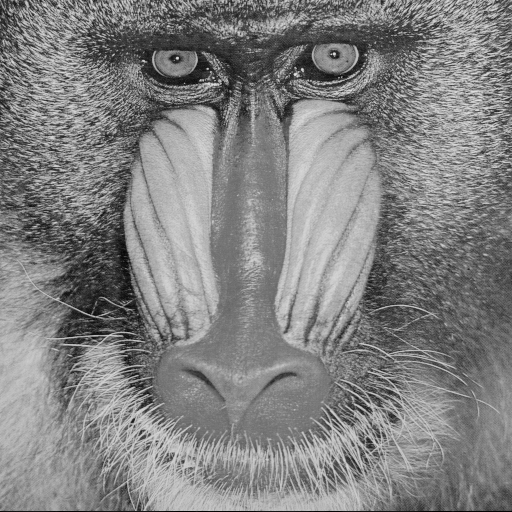

In [5]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/Week6/mandrill.tiff')
img1_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
cv2_imshow(img1_gray)

### Sharpen
Di bawah ini adalah teknik untuk menajamkan citra menggunakan kernel


```
sharpener_kernel = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0],
    ]
)
```



In [6]:
sharpener_kernel = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0],
    ]
)

In [7]:
sharpened_image = convolution2d(img1_gray, sharpener_kernel, padding=1)

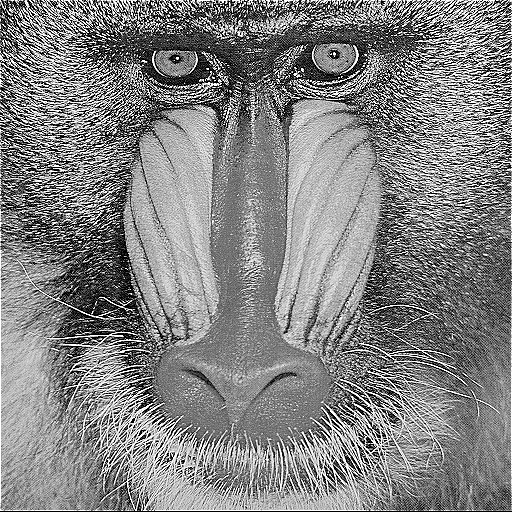

In [8]:
cv2_imshow(sharpened_image)

### Emboss
Di bawah ini adalah teknik untuk menghasilkan efek timbul pada citra menggunakan kernel


```
embosser_kernel = np.array(
    [
        [-2,-1, 0],
        [-1, 1, 1],
        [ 0, 1, 2]
    ]
)
```



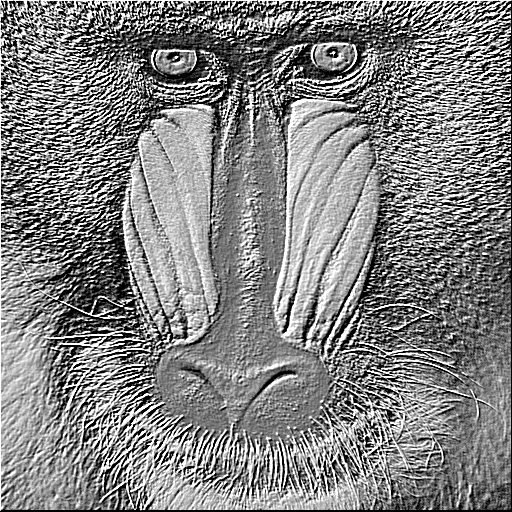

In [10]:
embosser_kernel = np.array(
    [
        [-2,-1, 0],
        [-1, 1, 1],
        [ 0, 1, 2]
    ]
)
embossed_image = convolution2d(img1_gray, embosser_kernel, padding=1)
cv2_imshow(embossed_image)

### Edge Detection
Edge detection digunakan untuk mengetahui garis-garis yang membentuk objek. Pada kali ini terdapat 3 kernel untuk membuat edge detection, yaitu:


#### Left Sobel Edge Detection


```
left_sobel_edge_detector_kernel = np.array(
    [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]
  )
```



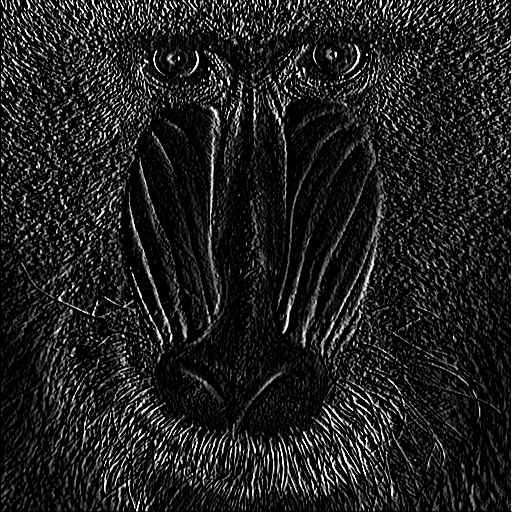

In [11]:
left_sobel_edge_detector_kernel = np.array(
    [
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ]
  )

edge_detection_img = convolution2d(img1_gray, left_sobel_edge_detector_kernel, padding=1)
cv2_imshow(edge_detection_img)

#### Canny Edge Detection


```
canny_edge_detector_kernel = np.array(
    [
        [-1,-1,-1],
        [-1, 8,-1],
        [-1,-1,-1]
    ]
)

```



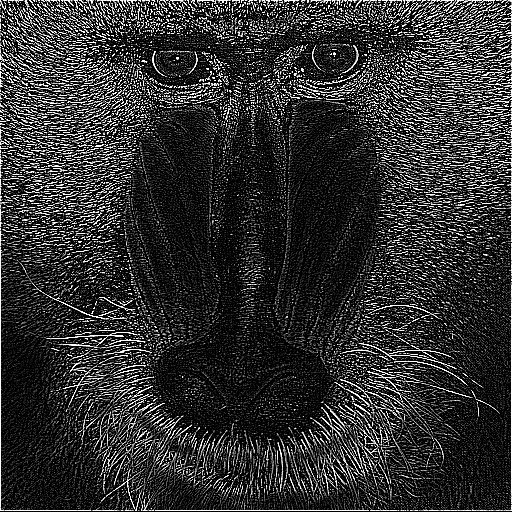

In [12]:
canny_edge_detector_kernel = np.array(
    [
        [-1,-1,-1],
        [-1, 8,-1],
        [-1,-1,-1]
    ]
)

canny_edge_detection_img = convolution2d(img1_gray, canny_edge_detector_kernel, padding=1)
cv2_imshow(canny_edge_detection_img)

#### Prewit Edge Detection


```
prewit_edge_detector_kernel = np.array(
    [
        [-1,-1,-1],
        [ 0, 0, 0],
        [ 1, 1, 1]
    ]
)
```



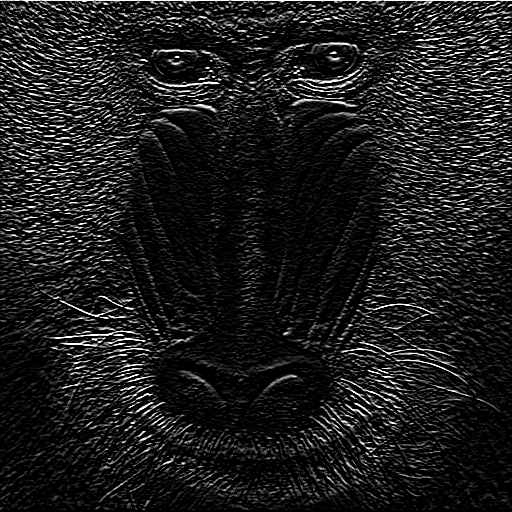

In [13]:
prewit_edge_detector_kernel = np.array(
    [
        [-1,-1,-1],
        [ 0, 0, 0],
        [ 1, 1, 1]
    ]
)

prewit_edge_detection_img = convolution2d(img1_gray, prewit_edge_detector_kernel, padding=1)
cv2_imshow(prewit_edge_detection_img)

### Gaussian Blur
Digunakan untuk mengurangi noise atau gangguan pada gambar dan juga untuk membuat gambar menjadi lebih halus atau terlihat lebih smooth.

Pada kali ini menggunakan 2 kernel gaussian blur yaitu:

#### Gaussian Blur 5x5


```
gaussian_blur_5 = np.array(
    [
        [1/256, 4/256, 6/256, 4/256, 1/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [6/256, 24/256, 36/256, 24/256, 6/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [1/256, 4/256, 6/256, 4/256, 1/256]
    ]
)
```



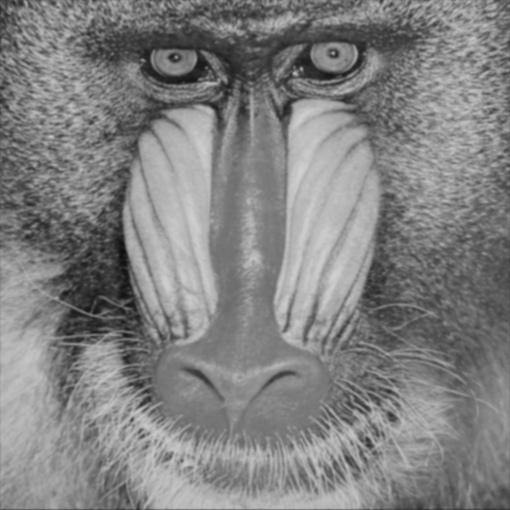

In [14]:
gaussian_blur_5 = np.array(
    [
        [1/256, 4/256, 6/256, 4/256, 1/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [6/256, 24/256, 36/256, 24/256, 6/256],
        [4/256, 16/256, 24/256, 16/256, 4/256],
        [1/256, 4/256, 6/256, 4/256, 1/256]
    ]
)

gaussian_blur_img = convolution2d(img1_gray, gaussian_blur_5, padding=1)
cv2_imshow(gaussian_blur_img)

#### Gaussian Blur 21*21
Pada gaussian blur 21*21 ini kita menggenerate kernel menggunakan kode di bawah ini

```
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gaussian = gaussian_kernel @ gaussian_kernel.transpose()
```


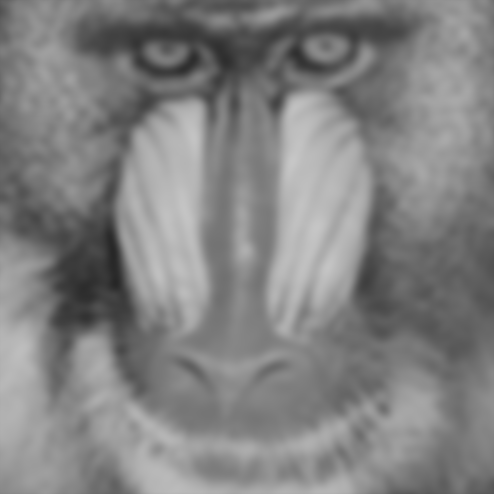

In [15]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gaussian = gaussian_kernel @ gaussian_kernel.transpose()


gaussian_blur_21_img = convolution2d(img1_gray, kernel_gaussian, padding=1)
cv2_imshow(gaussian_blur_21_img)

# FILTER LIBRARY DAN FILTER MODERN

## Percobaan 1

Pada percobaan 1 ini, kita akan membuat Filter Gaussian, Sharpen, dan Canny menggunakan library filter2d dari OpenCV. Filter ini akan kita terapkan pada Image RGB. Pada bagian awal kode terdapat fungsi show_side_by_side yang digunakan untuk menampilkan gambar secara berdampingan.

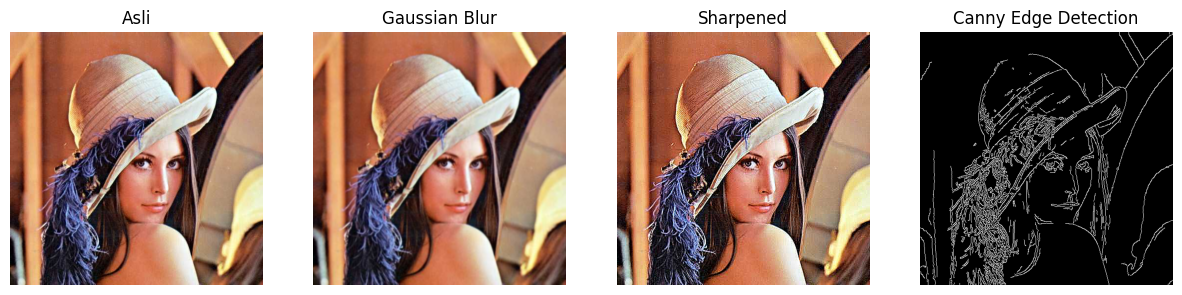

In [16]:
def show_side_by_side(images, titles, figsize=(15, 5)):
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        if len(img.shape) == 2:  # grayscale
            plt.subplot(1, len(images), i + 1)
            plt.imshow(img, cmap="gray")
        else:  # color
            plt.subplot(1, len(images), i + 1)
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()


img_lena = cv.imread("/content/drive/MyDrive/PCVK/Week5/lena.jpg")
img_lena_gray = cv.cvtColor(img_lena, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img_lena, (7, 7), 1)
edges = cv.Canny(cv.cvtColor(img_lena, cv.COLOR_BGR2GRAY), 100, 200)
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened = cv.filter2D(img_lena, -1, sharpen_kernel)

show_side_by_side([img_lena, blur, sharpened, edges],
                  ["Asli", "Gaussian Blur", "Sharpened", "Canny Edge Detection"])


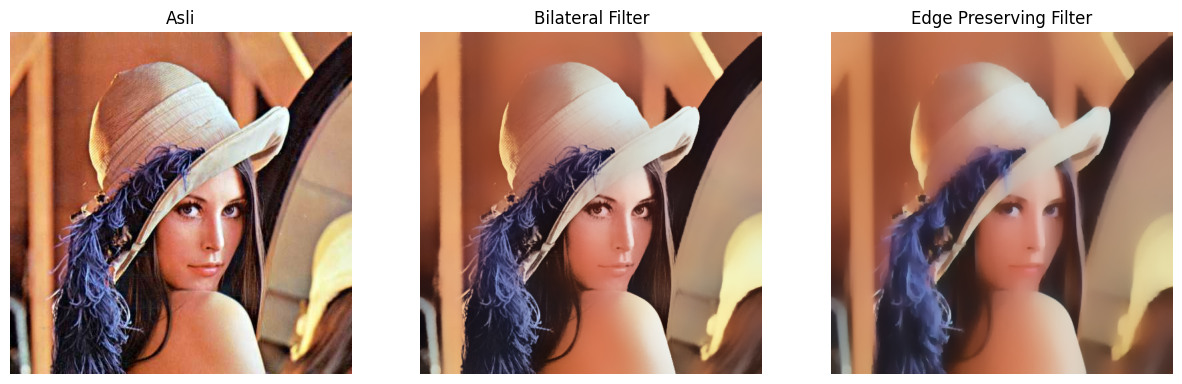

In [17]:
bilateral = cv.bilateralFilter(img_lena, 50, 100, 100)

edge_preserve = cv.edgePreservingFilter(img_lena, flags=1, sigma_s=100, sigma_r=0.9)
show_side_by_side([img_lena, bilateral, edge_preserve],
["Asli", "Bilateral Filter", "Edge Preserving Filter"])

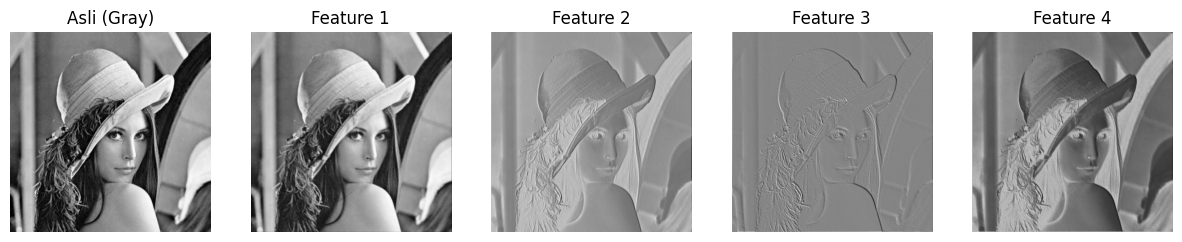

In [18]:
# Filter Feature Map yang digunakan pada CNN
# Lakukan running code bagian ini beberapa kali dan perhatikan hasilnya
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        return self.conv1(x)


model = SimpleCNN()

# Ubah gambar ke tensor
img_tensor = torch.tensor(img_lena_gray, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

# Hasil CNN
with torch.no_grad():
    features = model(img_tensor)

# Visualisasi feature maps
feature_maps = [features[0, i].numpy() for i in range(features.shape[1])]
show_side_by_side(
    [img_lena_gray] + feature_maps,
    ["Asli (Gray)"] + [f"Feature {i + 1}" for i in range(len(feature_maps))]
)

In [19]:
# 1. Beauty Filter
smooth = cv.bilateralFilter(img_lena, d=15, sigmaColor=75, sigmaSpace=75)

# Step 2: Unsharp masking (pertajam mata/bibir)
gaussian = cv.GaussianBlur(smooth, (0, 0), 3)
sharpened = cv.addWeighted(smooth, 1.5, gaussian, -0.5, 0)

# Step 3: Brightness & contrast
alpha = 1.2  # contrast
beta = 15    # brightness
beauty = cv.convertScaleAbs(sharpened, alpha=alpha, beta=beta)

# ============================================================
# 2. Old/Vintage Filter
# ============================================================

# Step 1: Sepia tone
sepia_kernel = np.array([
    [0.272, 0.534, 0.131],
    [0.349, 0.686, 0.168],
    [0.393, 0.769, 0.189]
])
sepia = cv.transform(img_lena, sepia_kernel)
sepia = np.clip(sepia, 0, 255).astype(np.uint8)

# Step 2: Vignette
rows, cols = img_lena.shape[:2]
kernel_x = cv.getGaussianKernel(cols, cols * 0.6)
kernel_y = cv.getGaussianKernel(rows, rows * 0.6)
kernel = kernel_y * kernel_x.T
mask = kernel / kernel.max()

vignette = np.copy(sepia)
for i in range(3):
    vignette[:, :, i] = vignette[:, :, i] * mask

# Step 3: Noise/Grain
noise = np.random.normal(0, 15, vignette.shape).astype(np.int16)
old_img_lena = np.clip(vignette.astype(np.int16) + noise, 0, 255).astype(np.uint8)


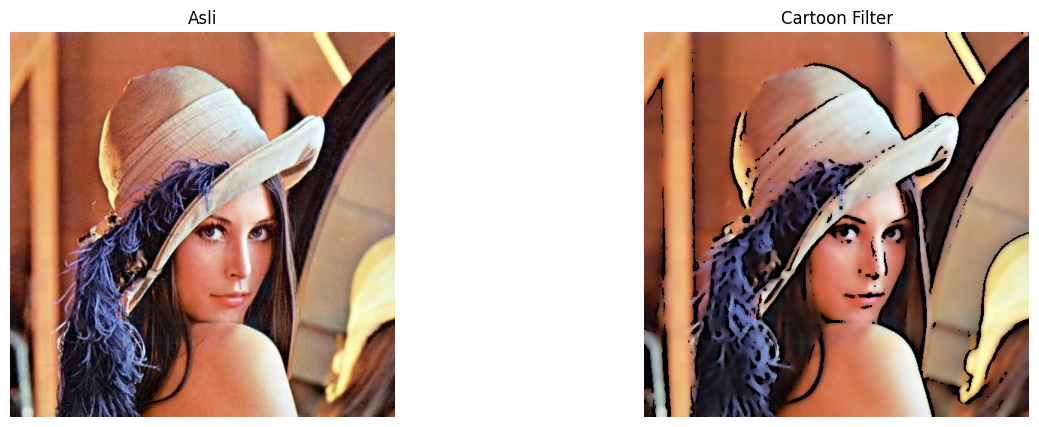

In [22]:
#Filter Anime / Cartoon
# Step 1: Edge detection (pakai median blur dulu agar gambar menjadi Lebih halus)
gray = cv. cvtColor(img_lena, cv.COLOR_BGR2GRAY)
gray_blur = cv.medianBlur (gray, 7)
edges = cv.adaptiveThreshold(gray_blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 9, 9)
# Step 2: Bilateral filter untuk smoothing warna
color = cv.bilateralFilter(img_lena, d=9, sigmaColor=200, sigmaSpace=200)
# Step 3: Gabungkan (cartoonize)
cartoon = cv.bitwise_and(color, color, mask=edges)
# Tampilkan
show_side_by_side([img_lena, cartoon], ["Asli", "Cartoon Filter"])

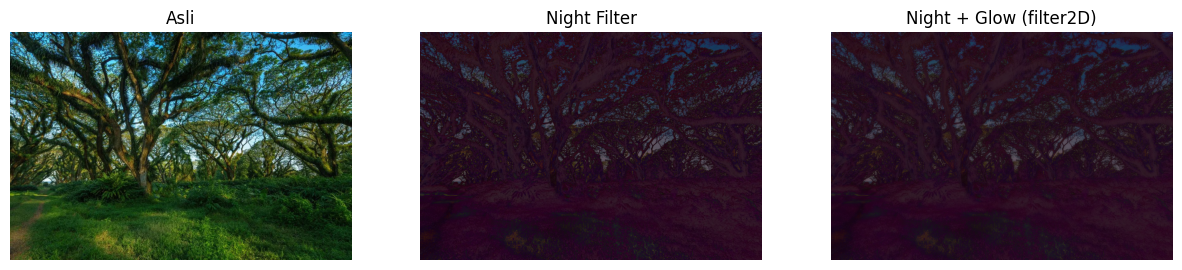

In [23]:
#Night Filter
img_djawatan = cv.imread("/content/drive/MyDrive/PCVK/Week5/djawatan.jpg")
img_djawatan_gray = cv.cvtColor(img_djawatan, cv.COLOR_BGR2GRAY)
# Step 1: GeLapkan (contrast turun, brightness negatif)
night = cv.convertScaleAbs(img_djawatan, alpha=0.6, beta=-40)
# Step 2: Tambah bias biru
blue_tint = np.full_like(night, (50, 0, 100)) # BGR
night = cv.addWeighted (night, 0.8, blue_tint, 0.2, 0)
# Step 3: Efek glow di area terang dengan filter2D (blur kernel)
kernel = np.ones ( (15,15), np.float32) / 225
glow = cv. filter2D(night, -1, kernel)
# Kombinasikan asli + glow
night_glow = cv.addWeighted(night, 0.7, glow, 0.3, 0)
show_side_by_side([img_djawatan, night, night_glow],
["Asli", "Night Filter", "Night + Glow (filter2D)"])

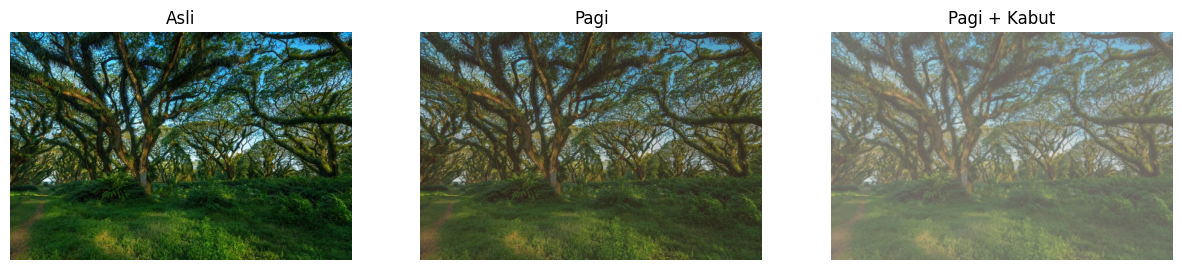

In [25]:
#Filter Suasana pagi dan Kabut
# Step 1: Kurangi kontras & cerahkan

alpha = 0.9 # contrast
beta = 20
# brightness
soft = cv.convertScaleAbs(img_djawatan, alpha=alpha, beta=beta)

# ニニニニニニニニニニニニ
# Step 2: Tambahkan warm tone (kemerahan / oranye)
# =ニニニニニニニニニニ
warm_tint = np.full_like(soft, (40, 70, 120)) # BGR
pagi = cv.addWeighted(soft, 0.8, warm_tint, 0.2, 0)
# ===============:========
# Step 3: Tambahkan haze (kabut tipis) dengan filter2D
# ==========
# Kernel blur Gaussian-Like untuk menciptakan efek kabut
kernel = cv.getGaussianKernel(3, 3)
kernel = kernel @ kernel.T # jadikan 2D kernel
kabut = cv.filter2D(pagi, -1, kernel)
# tambah layer putih untuk kabut lebih nyata
white_layer = np.full_like(pagi, 255)
kabut = cv.addWeighted(kabut, 0.7, white_layer, 0.3, 0)
show_side_by_side([img_djawatan, pagi, kabut],
["Asli", "Pagi", "Pagi + Kabut"])